# <U> PART 2

## Clustering Indian Cities on the basis of



> 1. Availability of gym/fitness centers <br>
2.Availability of zoos/parks/gardens <br>
3.Availability of transportation <br>
4.Availability of historical monuments

In [69]:
!pip install geocoder
!pip install geopy
!pip install folium
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [70]:
df= pd.read_csv('indian_cities.csv')
df.head()

Unnamed: 0 name_of_city   latitude  longitude
0           0      Abohar   30.145054  74.195660
1           1    Achalpur   21.241445  77.425757
2           2    Adilabad   19.500000  78.500000
3           3   Adityapur   22.782355  86.159003
4           5    Agartala   23.831238  91.282382

In [71]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [72]:
df.head()

name_of_city   latitude  longitude
0      Abohar   30.145054  74.195660
1    Achalpur   21.241445  77.425757
2    Adilabad   19.500000  78.500000
3   Adityapur   22.782355  86.159003
4    Agartala   23.831238  91.282382

<br>

# Visualizing the cities using folium

In [73]:
import folium
map_india = folium.Map(location=[20.5937,78.9629],zoom_start=5,tiles='Stamen Terrain')

for lat,long,city in zip(df['latitude'],df['longitude'],df['name_of_city']):
    label=str(city)
    
    folium.CircleMarker(
        [lat,long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opactiy=0.7,
        parse_html=False
      
    ).add_to(map_india)
    
map_india

<br>

# Exploring venues in the cities using -  FourSquare API

In [75]:
CLIENT_ID = 'KTAD35UPP4LP3PWFTGKBVYO4OM4AYJPMCLN1IZZNW4EQGKTQ'
CLIENT_SECRET = 'EQTRXAVFD5XGAX3BQGHVOVVXGROJGINFQT4QGXDQKFNTPWLF'
VERSION = '20191101'

In [76]:
import requests
def VenuesTypes(row, radius=500):
    
    lat=row['latitude']
    lng=row['longitude']

        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
    venue=[]       
        # make the GET request
    results = requests.get(url).json()
 
    for i in range(len(results['response']['venues'])):
        for j in results['response']['venues'][i]['categories']:
             venue.append(j['name'])
                
    return venue
 
   
    

In [77]:
df['Venue Types'] = df.apply(lambda row: VenuesTypes(row),axis=1)

In [78]:
df.head()

name_of_city   latitude  longitude  \
0      Abohar   30.145054  74.195660   
1    Achalpur   21.241445  77.425757   
2    Adilabad   19.500000  78.500000   
3   Adityapur   22.782355  86.159003   
4    Agartala   23.831238  91.282382   

                                         Venue Types  
0  [General Travel, Park, Building, Bus Station, ...  
1  [Doctor's Office, Hospital, Hospital, Vegetari...  
2                                             [Food]  
3  [General Travel, Department Store, Hotel, Beac...  
4  [Historic Site, Pizza Place, Hotel, Historic S...

In [79]:
df = df.assign(Venue=df['Venue Types'].str.split(",")).explode('Venue Types')

In [80]:
df.head()

name_of_city   latitude  longitude        Venue Types  Venue
0      Abohar   30.145054   74.19566     General Travel    NaN
0      Abohar   30.145054   74.19566               Park    NaN
0      Abohar   30.145054   74.19566           Building    NaN
0      Abohar   30.145054   74.19566        Bus Station    NaN
0      Abohar   30.145054   74.19566  French Restaurant    NaN

In [81]:
df.drop(columns=['Venue'],axis=1,inplace=True)

In [82]:
df.head()

name_of_city   latitude  longitude        Venue Types
0      Abohar   30.145054   74.19566     General Travel
0      Abohar   30.145054   74.19566               Park
0      Abohar   30.145054   74.19566           Building
0      Abohar   30.145054   74.19566        Bus Station
0      Abohar   30.145054   74.19566  French Restaurant

In [83]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

name_of_city    0
latitude        0
longitude       0
Venue Types     0
dtype: int64

In [84]:
df.to_csv('Cities_Venues_List.csv')

In [85]:
df= pd.read_csv('Cities_Venues_List.csv')

In [86]:
df.head()

Unnamed: 0 name_of_city   latitude  longitude        Venue Types
0           0      Abohar   30.145054   74.19566     General Travel
1           0      Abohar   30.145054   74.19566               Park
2           0      Abohar   30.145054   74.19566           Building
3           0      Abohar   30.145054   74.19566        Bus Station
4           0      Abohar   30.145054   74.19566  French Restaurant

In [87]:
temp = pd.get_dummies(df['Venue Types'])

In [88]:
temp.head()

ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0    0                  0               0                   0   
1    0                  0               0                   0   
2    0                  0               0                   0   
3    0                  0               0                   0   
4    0                  0               0                   0   

   Afghan Restaurant  African Restaurant  Airport  Airport Gate  \
0                  0                   0        0             0   
1                  0                   0        0             0   
2                  0                   0        0             0   
3                  0                   0        0             0   
4                  0                   0        0             0   

   Airport Lounge  Airport Service  ...  Well  Whisky Bar  Wine Bar  \
0               0                0  ...     0           0         0   
1               0                0  ...     0           0         0   
2               0                0  ...     0           0         0   
3               0                0  ...     0           0         0   
4               0                0  ...     0           0         0   

   Wine Shop  Winery  Wings Joint  Women's Store  Yoga Studio  Zoo  \
0          0       0            0              0            0    0   
1          0       0            0              0            0    0   
2          0       0            0              0            0    0   
3          0       0            0              0            0    0   
4          0       0            0              0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 570 columns]

In [89]:
final_df = pd.concat([df, temp], axis=1)

In [90]:
final_df = final_df.groupby('name_of_city').mean().reset_index()

In [91]:
final_df.head()

name_of_city  Unnamed: 0   latitude  longitude       ATM  Accessories Store  \
0      Abohar          0.0  30.145054  74.195660  0.045455                0.0   
1    Achalpur          1.0  21.241445  77.425757  0.000000                0.0   
2    Adilabad          2.0  19.500000  78.500000  0.000000                0.0   
3   Adityapur          3.0  22.782355  86.159003  0.000000                0.0   
4    Agartala          4.0  23.831238  91.282382  0.000000                0.0   

   Adult Boutique  Advertising Agency  Afghan Restaurant  African Restaurant  \
0             0.0                 0.0                0.0            0.015152   
1             0.0                 0.0                0.0            0.000000   
2             0.0                 0.0                0.0            0.000000   
3             0.0                 0.0                0.0            0.000000   
4             0.0                 0.0                0.0            0.000000   

   ...  Well  Whisky Bar  Wine Bar  Wine Shop    Winery  Wings Joint  \
0  ...   0.0         0.0       0.0        0.0  0.015152          0.0   
1  ...   0.0         0.0       0.0        0.0  0.000000          0.0   
2  ...   0.0         0.0       0.0        0.0  0.000000          0.0   
3  ...   0.0         0.0       0.0        0.0  0.000000          0.0   
4  ...   0.0         0.0       0.0        0.0  0.000000          0.0   

   Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0       0.015152          0.0  0.0          0.0  
1       0.000000          0.0  0.0          0.0  
2       0.000000          0.0  0.0          0.0  
3       0.000000          0.0  0.0          0.0  
4       0.023810          0.0  0.0          0.0  

[5 rows x 574 columns]

In [92]:
list(final_df.columns)

['name_of_city',
 'Unnamed: 0',
 'latitude',
 'longitude',
 'ATM',
 'Accessories Store',
 'Adult Boutique',
 'Advertising Agency',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'Airport Tram',
 'American Restaurant',
 'Amphitheater',
 'Andhra Restaurant',
 'Animal Shelter',
 'Antique Shop',
 'Apres Ski Bar',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Art Studio',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Assisted Living',
 'Astrologer',
 'Athletics & Sports',
 'Auditorium',
 'Australian Restaurant',
 'Auto Dealership',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'Awadhi Restaurant',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bathing Area',
 'Beach',
 'Beach Bar',
 

# Creating clusters by identifying patterns

In [132]:
import matplotlib.cm as cm
import matplotlib 
import matplotlib.colors as mcolors

def visualize():
     map_clusters = folium.Map(location=[20.5937,78.9629], zoom_start=5,tiles='Stamen Terrain')

# set color scheme for the clusters
#x = np.arange(4)
#ys = [i + x + (i*x)**2 for i in range(5)]
     rainbow = ['lime','yellow','red','green','blue','maroon']

# add markers to the map
     markers_colors = []
     for lat, lon, poi, cluster in zip(final_df['latitude'], final_df['longitude'], final_df['name_of_city'], final_df['labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
     return map_clusters

### MODEL - KMeans

### Selecting optimum number of cluster

In [94]:
!pip install yellowbrick

In [95]:
def get_OptimumClusters(column):

    from yellowbrick.cluster import KElbowVisualizer
    model = KMeans()
# k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
    visualizer.fit(final_df[column])        # Fit data to visualizer
    #visualizer.show()    
    return visualizer.elbow_value_

### To display the distribution of clusters

In [96]:
def results(cols):
    lst=[]
    for x in range(6):
        cluster = final_df.loc[final_df['labels']==x]
        final_df.loc[final_df['labels']==0]
        total = final_df[cols].sum().sum()
        Sum = cluster[cols].sum().sum()
        percent = Sum/total*100
        lst.append(round(percent,2))
        
    return df(lst)
        


def df(lst):
    res= pd.DataFrame(columns=['Cluster'])
    res['Cluster']=[0,1,2,3,4,5]
    res.reset_index()
    res['Distribution']=lst
    labels = '0', '1', '2', '3', '4', '5'
    sizes = [15, 20, 10, 17, 1, 37]
    explode = (0, 0.1, 0, 0, 0, 0)
    #res['Distribution'].plot(kind='pie',sizes=sizes,labels=labels,explode=explode,autopct='%1.1f%%')
    plt.pie(res['Distribution'], labels=labels, explode=explode, autopct='%1.1f%%')
    plt.xlabel('Clusters')
    return res

### 1. Colleges and universities across citites

6

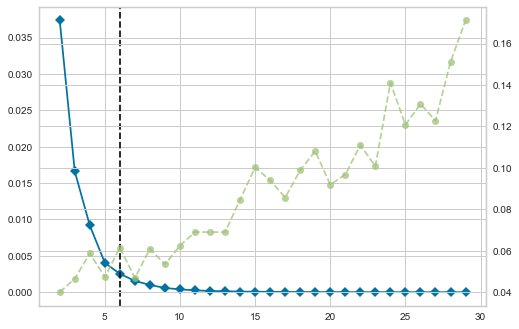

In [97]:
get_OptimumClusters([ 'College & University',
 'College Academic Building'])

In [136]:
from sklearn.cluster import KMeans
cols=[ 'College & University','College Academic Building']
model= KMeans(n_clusters=6).fit(final_df[cols])
final_df['labels']=model.labels_
visualize()

### 2. Transportation

   Cluster  Distribution
0        0         30.27
1        1         20.43
2        2         17.06
3        3          3.32
4        4          9.95
5        5          6.19


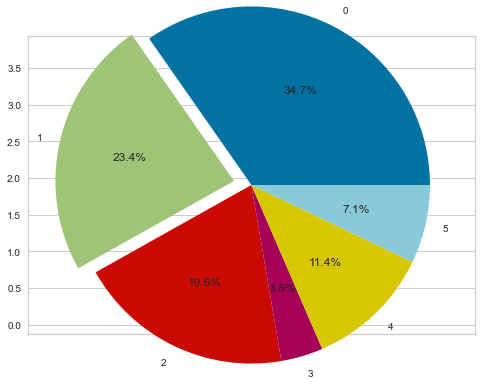

In [99]:
columns= [ 'Bus Line','Bus Station','Bus Stop','Metro Station','Taxi Stand', 'Train Station', 'Tram Station', 'Transportation Service', 'Travel & Transport']
k= get_OptimumClusters(columns)
model= KMeans(n_clusters=k).fit(final_df[columns])
final_df['labels'] = model.labels_
print(results(columns))
visualize()

### 3.Medical Facilities (Hospitals)

   Cluster  Distribution
0        0          9.45
1        1         39.32
2        2         14.88
3        3          5.59
4        4         30.77
5        5          0.00


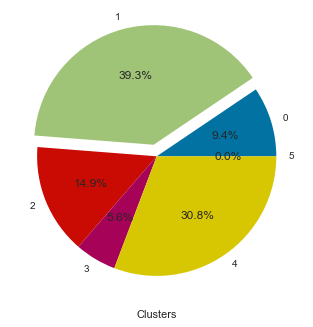

In [101]:
column=[  'Hospital','Hospital Ward']
model= KMeans(n_clusters=5).fit(final_df[column])
final_df['labels'] = model.labels_
print(results(column))
visualize()

### 4.Airports

   Cluster  Distribution
0        0          0.00
1        1         27.46
2        2         23.73
3        3          7.84
4        4         40.97
5        5          0.00


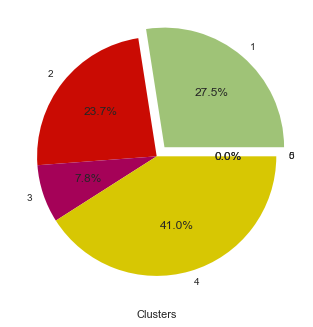

In [41]:
column=[ 'Airport']
model= KMeans(n_clusters=5).fit(final_df[column])
final_df['labels'] = model.labels_
print(results(column))
visualize()

### 5.Schools

   Cluster  Distribution
0        0         54.66
1        1          0.00
2        2          8.85
3        3         28.68
4        4          7.81
5        5          0.00


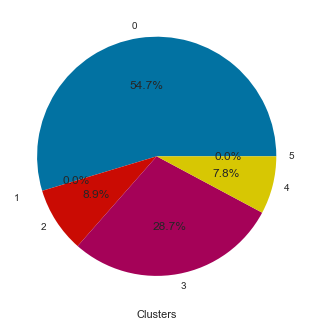

In [108]:
column=['School']
model= KMeans(n_clusters=5).fit(final_df[column])
final_df['labels'] = model.labels_
print(results(column))
visualize()

### 6.Residential buildings/apartments

   Cluster  Distribution
0        0         30.14
1        1         21.29
2        2          0.00
3        3         26.59
4        4         21.99
5        5          0.00


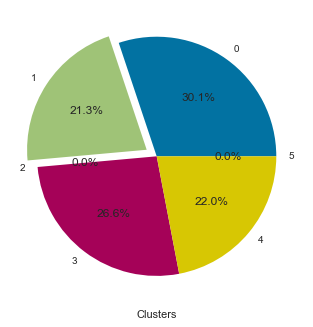

In [104]:
column=['Residential Building (Apartment / Condo)']
model= KMeans(n_clusters=5).fit(final_df[column])
final_df['labels'] = model.labels_
print(results(column))
visualize()

# Customized clustering based on user input

Enter a keyword for which you would like to cluster: Beach
------------------------------------------------------------
   Cluster  Distribution
0        0          2.42
1        1         33.98
2        2         25.74
3        3         25.74
4        4         12.12
5        5          0.00
************************************************************


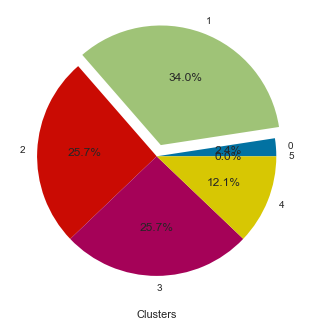

In [133]:

try:
    s= input('Enter a keyword for which you would like to cluster: ')
    print('-'*60)
    columns=[i for i in final_df.columns if s in i]
    model= KMeans(n_clusters=5).fit(final_df[columns])
    final_df['labels'] = model.labels_
    print(results(columns))
    print('*'*60)

except:
    print('Please enter a valid keyword')
visualize()